# Problem Set 1 - Part 2: Lambda Calculus

The lab is an exploration and learning exercise to be done in a group and also in discussion with the teachers and other students.

Before starting, please read the following instructions on [how to work on group assignments](https://github.com/sdobnik/computational-semantics/blob/master/README.md).

Write all your answers and the code in the appropriate boxes below.

In [1]:
# This task needs NLTK and Jupyter Notebook (IPython package).
import nltk
from nltk.grammar import FeatureGrammar
from utils import display_latex, display_translation, display_tree, display, Markdown

### 1. Types of (Expression) objects in Python/NLTK and semantic types

First order logic expressions and lambda expressions are our **object language** that we use to represent semantics of linguistic expressions. The object language is implemented in Python which is the **meta language**. We write logic and lambda expressions as strings that are then converted to Python/NLTK objects that are then processed with Python methods.

The goal of this question is to learn about **types**. In the object language we use types that correspond to the meaning of the corresponding expressions in natural language (the basic types `e` and `t` and function types based on these such as `<e,t>`), in the meta language we use types that are practically required for computation (`<IndividualVariableExpression x>`). How do these type systems compare?

We can translate logic expressions written as a string into one of the `nltk.sem.logic.Expression` types as follows:

In [2]:
read_expr = nltk.sem.Expression.fromstring

# different representations have different valid types:
expressions = [
    read_expr(r"x"),
    read_expr(r"P"),
    read_expr(r"rob"),
    read_expr(r"\x.P(x)"),
    read_expr(r"\x.homosapien(x)"),
    read_expr(r"P(x)"),
    read_expr(r"P(rob)"),
    read_expr(r"homosapien(rob)"),
    read_expr(r"(\y \x.love(x, y))(rob)"),
    read_expr(r"homosapien(rob) & run(rob)"),
    read_expr(r"exists x.(homosapien(x) & run(x))"),
    read_expr(r"all x.(homosapien(x) & run(x))"),
]

for expr in expressions:
    display_latex(expr, with_types=True)

display(Markdown(r"""----

**Note**: *Python interprets `\` as a marker for special characters.
To prevent this, we use `r` in `r"strings"` in order to force the raw interpretation of strings.*

----"""))

$x$ = `<IndividualVariableExpression x>`

$P$ = `<FunctionVariableExpression P>`

$rob$ = `<ConstantExpression rob>`

$\lambda\ x.P(x)$ = `<LambdaExpression \x.P(x)>`

$\lambda\ x.homosapien(x)$ = `<LambdaExpression \x.homosapien(x)>`

$P(x)$ = `<ApplicationExpression P(x)>`

$P(rob)$ = `<ApplicationExpression P(rob)>`

$homosapien(rob)$ = `<ApplicationExpression homosapien(rob)>`

$(\lambda\ y\ x.love(x,y))(rob)$ = `<ApplicationExpression (\y x.love(x,y))(rob)>`

$(homosapien(rob)\ \land\ run(rob))$ = `<AndExpression (homosapien(rob) & run(rob))>`

$\exists\ x.(homosapien(x)\ \land\ run(x))$ = `<ExistsExpression exists x.(homosapien(x) & run(x))>`

$\forall\ x.(homosapien(x)\ \land\ run(x))$ = `<AllExpression all x.(homosapien(x) & run(x))>`

----

**Note**: *Python interprets `\` as a marker for special characters.
To prevent this, we use `r` in `r"strings"` in order to force the raw interpretation of strings.*

----

With the following type assumptions:
```
x : e
P : <e, t>
rob: e
```
**1a.** What is the semantic type of each expression below? Assume an approprate type for `homosapien` and `run` based on how they are used in other examples. **[5 marks]**


Replace `???` below:

```
P(x): t
P(rob): t
homosapien(rob): t
homosapien: <e, t>
\x.P(x): <e, t>
\x.homosapien(x): <e, t>
(\y \x.love(x, y))(rob): <e, <e,t>>(e) ==> <e, t>
homosapien(rob) & run(rob): t
exists x.(homosapien(x) & run(x)): t
all x.(homosapien(x) & run(x)): t
```

1b. Some well-formed NLTK expressions do not have a valid semantic type. Explain the issue in the expression below **[2 marks]**:

In [3]:
display_latex(read_expr(r"rob & marry"), with_types=True)

$(rob\ \land\ marry)$ = `<AndExpression (rob & marry)>`

1. Such logic expression --that consists of two constants only-- cannot have a meaning representation. We need a function that can be evaluated to a truth value. 
2. *marry* looks like its a function - but no arguments/variables

### 2. Translate verb phrases

Translate the verb phrases using $\lambda$ abstracts and verify the resulting formulae with `Expression.fromstring`. Here is an example:

In [4]:
translations = {
    "read by Rob": read_expr(r"\x.read(rob, x)"),
    "read a book": read_expr(r"\x. exists y. (book(y) & read(x, y))"),
}

for text, expr in translations.items():
    display_translation(text, expr)

"read by Rob": $\lambda\ x.read(rob,x)$

"read a book": $\lambda\ x.\exists\ y.(book(y)\ \land\ read(x,y))$

Replace `xxx` with valid representations in the dictionary of expressions **[4 marks]**:

In [5]:
# fix the following translations:
translations = {
    "be admired by no-one":        read_expr(r"\x. - exists y. (admire(y, x))"),
    "catch a fish and eat it":     read_expr(r"\x. exists y. (fish(y) & catch(x, y) & eat(x, y))"),
    "read a book or watch a film": read_expr(r"\x. exists y.((book(y) & read(x, y)) or (film(y) & watch(x, y)))"),
    "give every boy a dime":       read_expr(r"all y. (boy(y) -> \x. exists z. (dime(z) & give(x, y, z)))")
}

for text, expr in translations.items():
    display_translation(text, expr, to_latex=False)

"be admired by no-one": `<LambdaExpression \x.-exists y.admire(y,x)>`

"catch a fish and eat it": `<LambdaExpression \x.exists y.(fish(y) & catch(x,y) & eat(x,y))>`

"read a book or watch a film": `<LambdaExpression \x.exists y.((book(y) & read(x,y)) | (film(y) & watch(x,y)))>`

"give every boy a dime": `<AllExpression all y.(boy(y) -> \x.exists z.(dime(z) & give(x,y,z)))>`

### 3. Function application and $\beta$-reduction
In the following examples some code has been deleted and replaced with `<????>`. What has been deleted? Verify that your answer is correct. **[4 marks]**

In [6]:
e1 = read_expr(r'\x.like(x, rob)')
e2 = read_expr(r'pip')
e3 = nltk.sem.ApplicationExpression(e1,e2) 
display_latex(e3.simplify())
# with reuslt like(pip,rob).
display_latex(read_expr(r"like(pip,rob)"))

e1 = read_expr(r'\P. P(pip)')
e2 = read_expr(r'\x.play(x,scherzo)') 
e3 = nltk.sem.ApplicationExpression(e1,e2)
display_latex(e3.simplify())
# with result play(pip,scherzo).
display_latex(read_expr(r"play(pip,scherzo)"))

e1 = read_expr(r'\P exists x.(woman(x) & P(x))')
e2 = read_expr(r'\x. play(x,etude)')
e3 = nltk.sem.ApplicationExpression(e1,e2) 
display_latex(e3.simplify())
# with result exists x.(woman(x) & play(x,etude)).
display_latex(read_expr(r"exists x.(woman(x) & play(x,etude))"))

e1 = read_expr(r'\Q. \x. Q(like(x))')
e2 = read_expr(r'\P. all x. (musician(x) -> P(x))') 
e3 = nltk.sem.ApplicationExpression(e1,e2) 
display_latex(e3.simplify())
# with result \x.all z2.(musician(z2) -> like(x,z2)).
display_latex(read_expr(r"\x. all z2.(musician(z2) -> like(x,z2))"))

$like(pip,rob)$

$like(pip,rob)$

$play(pip,scherzo)$

$play(pip,scherzo)$

$\exists\ x.(woman(x)\ \land\ play(x,etude))$

$\exists\ x.(woman(x)\ \land\ play(x,etude))$

$\lambda\ x.\forall\ z_{1}.(musician(z_{1})\ \to\ like(x,z_{1}))$

$\lambda\ x.\forall\ z_{2}.(musician(z_{2})\ \to\ like(x,z_{2}))$

### 4. Extending the FCFG grammar

Extend the grammar simple_sem.fcfg that comes with NLTK `(~/nltk_data/grammars/book_grammars/)` so that it will cover the following sentences:

- no man gives a bone to a dog **[4 marks]**
- a boy and a girl chased every dog **[2 marks]**
- every dog chased a boy and a girl **[2 marks]**
- a brown cat chases a white dog **[4 marks]**

The last example includes adjectives. Several different kinds of adjectives are discussed in the literature [(cf. Kennedy, 2012)](http://semantics.uchicago.edu/kennedy/docs/routledge.pdf). In this example we have an intersective adjective. The denotiation we want for "brown cat" is a a set that we get by intersecting the set of individuals that are brown and the set of individuals that are cats.

C. Kennedy. Adjectives. In G. Russell, editor, The Routledge Companion to Philosophy of Language, chapter 3.3, pages 328–341. Routledge, 2012.

The original grammar is included in the code below as a string.

In [7]:
fcfg_string_orginal = r"""
% start S
############################
# Grammar Rules
#############################

S[SEM = <?subj(?vp)>] -> NP[NUM=?n,SEM=?subj] VP[NUM=?n,SEM=?vp]

NP[NUM=?n,SEM=<?det(?nom)> ] -> Det[NUM=?n,SEM=?det]  Nom[NUM=?n,SEM=?nom]
NP[LOC=?l,NUM=?n,SEM=?np] -> PropN[LOC=?l,NUM=?n,SEM=?np]

Nom[NUM=?n,SEM=?nom] -> N[NUM=?n,SEM=?nom]

VP[NUM=?n,SEM=?v] -> IV[NUM=?n,SEM=?v]
VP[NUM=?n,SEM=<?v(?obj)>] -> TV[NUM=?n,SEM=?v] NP[SEM=?obj]
VP[NUM=?n,SEM=<?v(?obj,?pp)>] -> DTV[NUM=?n,SEM=?v] NP[SEM=?obj] PP[+TO,SEM=?pp]

PP[+TO, SEM=?np] -> P[+TO] NP[SEM=?np]

#############################
# Lexical Rules
#############################

PropN[-LOC,NUM=sg,SEM=<\P.P(angus)>] -> 'Angus'
PropN[-LOC,NUM=sg,SEM=<\P.P(cyril)>] -> 'Cyril'
PropN[-LOC,NUM=sg,SEM=<\P.P(irene)>] -> 'Irene'
 
Det[NUM=sg,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'every'
Det[NUM=pl,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'all'
Det[SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'some'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'a'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'an'

N[NUM=sg,SEM=<\x.man(x)>] -> 'man'
N[NUM=sg,SEM=<\x.girl(x)>] -> 'girl'
N[NUM=sg,SEM=<\x.boy(x)>] -> 'boy'
N[NUM=sg,SEM=<\x.bone(x)>] -> 'bone'
N[NUM=sg,SEM=<\x.ankle(x)>] -> 'ankle'
N[NUM=sg,SEM=<\x.dog(x)>] -> 'dog'
N[NUM=pl,SEM=<\x.dog(x)>] -> 'dogs'

IV[NUM=sg,SEM=<\x.bark(x)>,TNS=pres] -> 'barks'
IV[NUM=pl,SEM=<\x.bark(x)>,TNS=pres] -> 'bark'
IV[NUM=sg,SEM=<\x.walk(x)>,TNS=pres] -> 'walks'
IV[NUM=pl,SEM=<\x.walk(x)>,TNS=pres] -> 'walk'
TV[NUM=sg,SEM=<\X x.X(\ y.chase(x,y))>,TNS=pres] -> 'chases'
TV[NUM=pl,SEM=<\X x.X(\ y.chase(x,y))>,TNS=pres] -> 'chase'
TV[NUM=sg,SEM=<\X x.X(\ y.see(x,y))>,TNS=pres] -> 'sees'
TV[NUM=pl,SEM=<\X x.X(\ y.see(x,y))>,TNS=pres] -> 'see'
TV[NUM=sg,SEM=<\X x.X(\ y.bite(x,y))>,TNS=pres] -> 'bites'
TV[NUM=pl,SEM=<\X x.X(\ y.bite(x,y))>,TNS=pres] -> 'bite'
DTV[NUM=sg,SEM=<\Y X x.X(\z.Y(\y.give(x,y,z)))>,TNS=pres] -> 'gives'
DTV[NUM=pl,SEM=<\Y X x.X(\z.Y(\y.give(x,y,z)))>,TNS=pres] -> 'give'

P[+to] -> 'to'
"""

Write your extension of this grammar here:

In [8]:
fcfg_string = fcfg_string_orginal + r"""
N[NUM=sg, SEM=<\x. cat(x)>] -> 'cat'
TV[NUM=?n, SEM=<\X.\x. X(\y.chase(x,y))>, TNS=past] -> 'chased'

CONJ -> 'and'

Adj[NUM=sg, SEM=<\x. brown(x)>] -> 'brown'
Adj[NUM=sg, SEM=<\x. white(x)>] -> 'white'

Det[NUM=?n, SEM=<\P.\Q. -(exists x.(P(x) & Q(x)))>] -> 'no'

NP[+CONJ, NUM=?n, SEM=<\P. (?x(P) & ?y(P))>] -> NP[NUM=?n, SEM=?x] CONJ NP[NUM=?n, SEM=?y]
Nom[NUM=?n, SEM=<\P. (?nom(P) & ?adj(P))>] -> Adj[SEM=?adj] Nom[NUM=?n, SEM=?nom]
"""

# Load `fcfg_string` as a feature grammar:
syntax = FeatureGrammar.fromstring(fcfg_string)

Run the code below without errors:

----

$-\exists\ x.(man(x)\ \land\ \exists\ z_{3}.(dog(z_{3})\ \land\ \exists\ z_{2}.(bone(z_{2})\ \land\ give(x,z_{2},z_{3}))))$

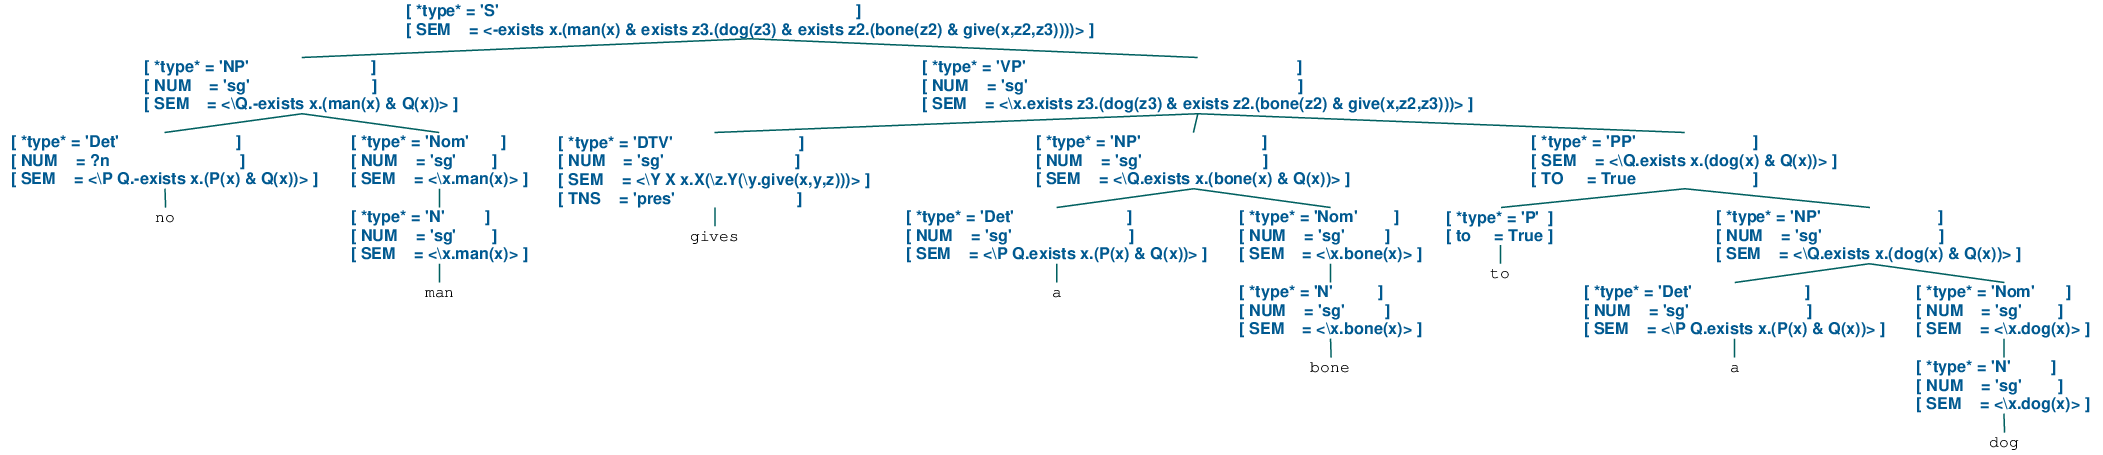

----

$(\exists\ x.(boy(x)\ \land\ \forall\ z_{4}.(dog(z_{4})\ \to\ chase(x,z_{4})))\ \land\ \exists\ x.(girl(x)\ \land\ \forall\ z_{4}.(dog(z_{4})\ \to\ chase(x,z_{4}))))$

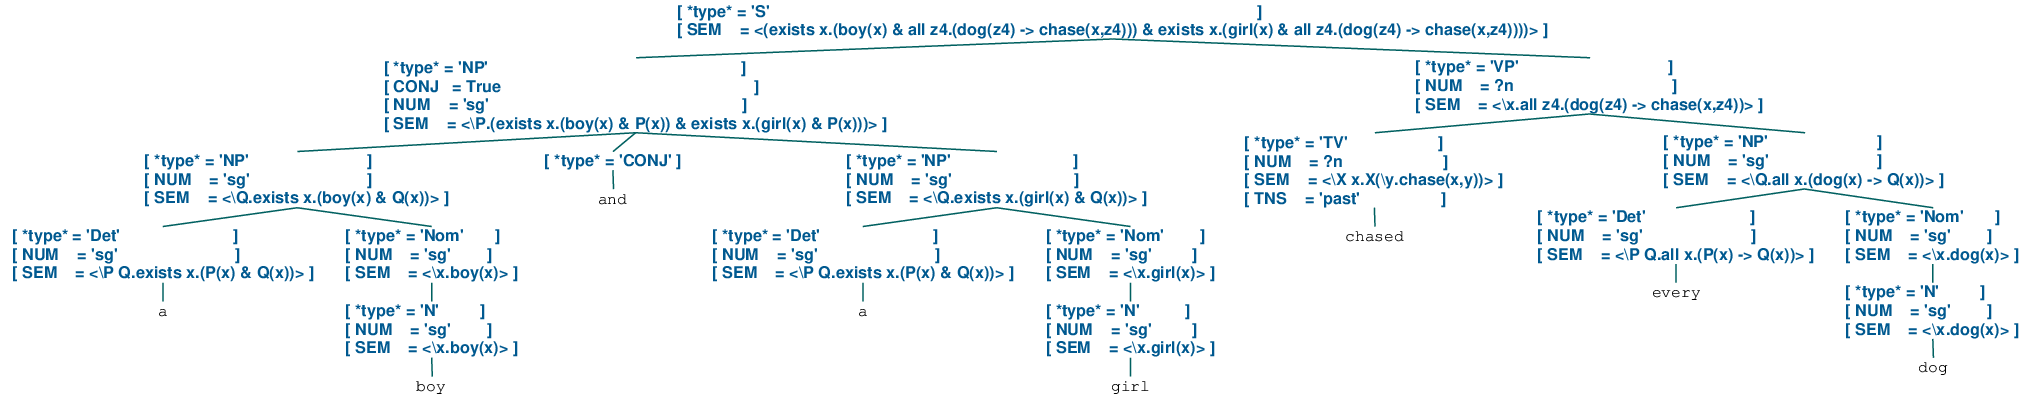

----

$\forall\ x.(dog(x)\ \to\ (\exists\ z_{6}.(boy(z_{6})\ \land\ chase(x,z_{6}))\ \land\ \exists\ z_{7}.(girl(z_{7})\ \land\ chase(x,z_{7}))))$

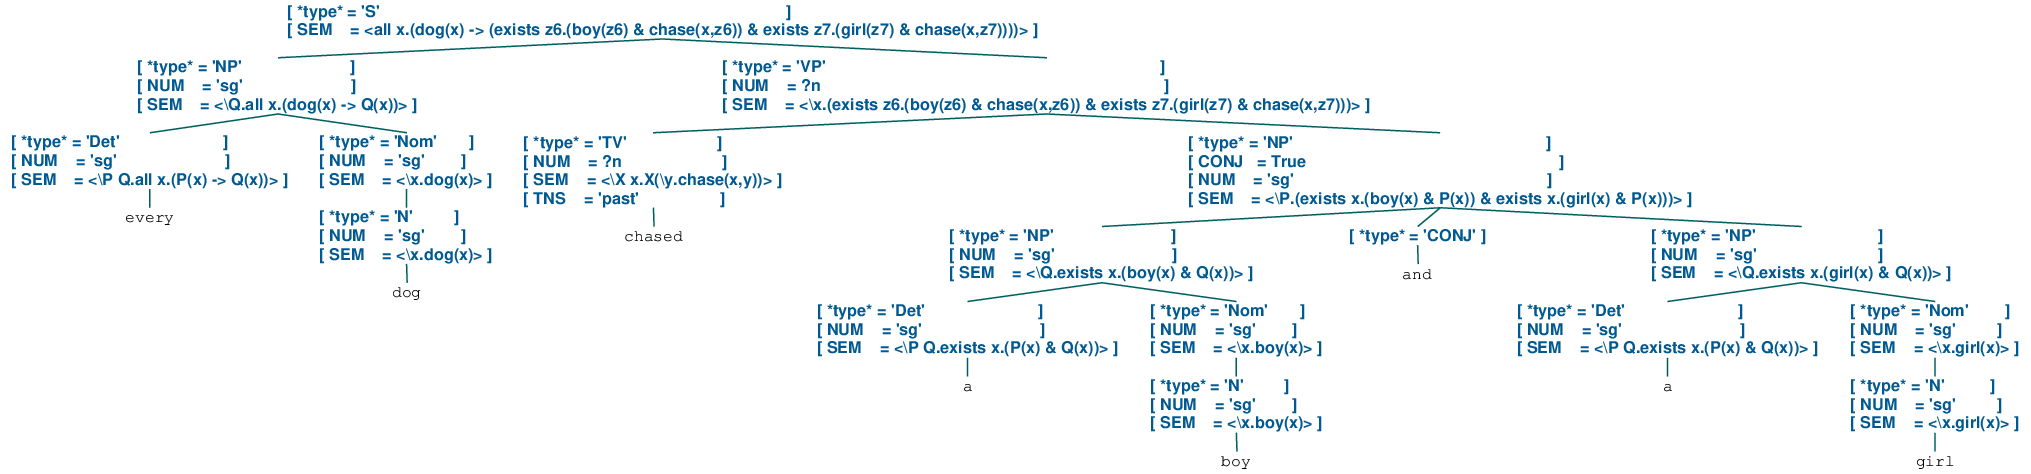

----

$\exists\ x.(cat(x)\ \land\ brown(x)\ \land\ \exists\ z_{8}.(dog(z_{8})\ \land\ white(z_{8})\ \land\ chase(x,z_{8})))$

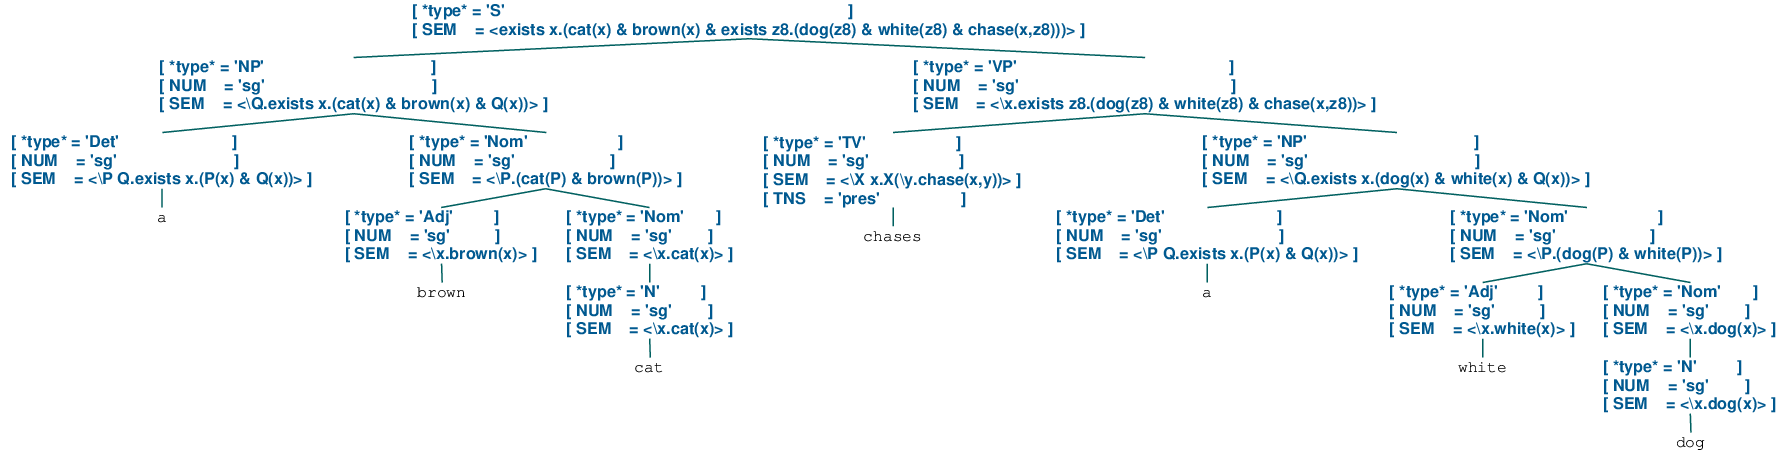

In [9]:
# remove sentences if you couldn't find answer for them
sentences = [
    'no man gives a bone to a dog',
    'a boy and a girl chased every dog',
    'every dog chased a boy and a girl',
    'a brown cat chases a white dog',
]

for results in nltk.interpret_sents(sentences, syntax):
    for (synrep, semrep) in results:
        display(Markdown('----'))
        display_latex(semrep) # prints the SEM feature of a tree
        display_tree(synrep) # show the parse tree


If you are working with iPython which is also running behind Jupyter notebooks and you are changing grammars and want to rerun a new version without restarting you may find `nltk.data.clear_cache()` useful.

## Marks

This part of the assignment has a total of 27 marks.